In [4]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.3.0


# The Dataset 
## import MNIST

In [5]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Shapes of Imported Arrays

In [6]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

# first axis is the number of examples in the array- 60,000 training examples and 10,000 test examples
# each example has 28 columns and 28 rows # basically means that each image is 28 pixels high and 28 pixels wide
# basically means that easch image is 28 pixels high and 28 pixels wide

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


## Plot an Image Example

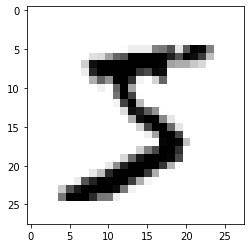

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# ensures that the images are displayed within the notebook

plt.imshow(x_train[0], cmap = 'binary') #binary is setting it as black and white
plt.show()

## Display Labels

In [8]:
y_train[0] # the value of the actual digit

5

In [9]:
print(set(y_train)) # displays the unique values in the training set (the classes we have)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding
## Encoding Labels


In [14]:
from tensorflow.keras.utils import to_categorical
# converts every label into one hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Validated Shapes

In [15]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)
# values have been converted into the 10 digit array, easier to apply NN now

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


## Display Encoded Labels

In [16]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Neural Networks

# Preprocessing the Examples

In [17]:
# take 784 dimensional vectors (28 x 28 pixels/image) as inputs and will output a 10 dimensional vector for the 10 classes
# what we want to do is make the 28x28 vector into a 784 x 1 array

import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

# each example is now a 784 dimensional vector
# each value in this vector corresponds to a pixel value in the image

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


## Display Pixel Values

In [19]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


## Data Normalization

In [20]:
#normalize each pixel value to make it easier to work with for the NN
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

# x mean being subtracted from all the pixel values in the training set
# adding small value (epsilon) to std (which can be very small) fixes unstability problems
# apply same value (x_mean) to test set and training set because you want to do same
# preprocessing on both sets- if did separately, might introduce bias in the test set

epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

mean:  33.318421449829934
std:  78.56748998339798


## Display Normalizated Pixel Values

In [21]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Creating a Model


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# more layers/nodes = more computing power, but more accurate, so there's a tradeoff

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)), 
    Dense(128, activation = 'relu'),  # more layers/nodes = more computing power, but more accurate, so there's a tradeoff
    Dense(10, activation = 'softmax') # more layers/nodes = more computing power, but more accurate, so there's a tradeoff
])

## Compiling the Model

In [24]:
model.compile(
    # more layers/nodes = more computing power, but more accurate, so there's a tradeoff
    optimizer = 'sgd',
    loss = 'categorical_crossentropy', # more layers/nodes = more computing power, but more accurate, so there's a tradeoff
    metrics = ['accuracy']
)

model.summary() # displays the architecture of the model

# manually calculate parameter = 10 (nodes in current layer) x 128 (nodes in the previous layer) = 1280 + 10 biases (an intercept from the previous layer is connected to each of the 10 current nodes) = 1290

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model


In [25]:
# use training set only -> don't use test set or model can cheat!
# go through examples 3 times
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 3
)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3646 - accuracy: 0.8929
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1840 - accuracy: 0.9453
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1377 - accuracy: 0.9602


In [26]:
# use model state after training, does forward pass to understand predictions of model, and compares with the labels... no back propagation for better acuracy
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9593
test set accuracy:  95.92999815940857


# Predictions

In [27]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting the Results

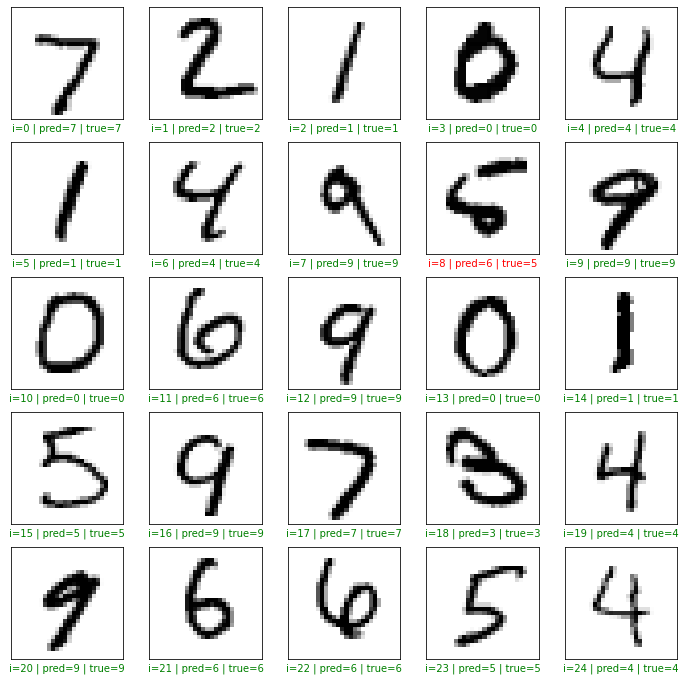

In [28]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g' # set the colour to green
    if pred != actual:
        col = 'r' # set the colour to red
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

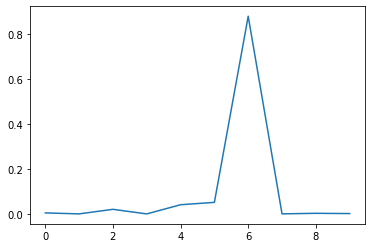

In [29]:

index = 8

plt.plot(preds[index])
plt.show() # softmax predictability outputs- it really really thinks it's 6 (80%)